# üîç YOLOÎ•º ÌôúÏö©Ìïú Ïã§ÏãúÍ∞Ñ Í∞ùÏ≤¥ ÌÉêÏßÄ

## üéØ ÌïôÏäµ Î™©Ìëú
- **YOLO(You Only Look Once)** ÏïåÍ≥†Î¶¨Ï¶òÏùò ÏõêÎ¶¨ Ïù¥Ìï¥
- **Ïã§ÏãúÍ∞Ñ Í∞ùÏ≤¥ ÌÉêÏßÄ** ÏãúÏä§ÌÖú Íµ¨ÌòÑ
- **Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ**Ïùò Ïã§Î¨¥ ÌôúÏö© Í≤ΩÌóò
- **Í∞úÏù∏ Ïù¥ÎØ∏ÏßÄ**Î•º ÌôúÏö©Ìïú ÎßûÏ∂§Ìòï ÌîÑÎ°úÏ†ùÌä∏

## üí° YOLOÎûÄ?
**YOLO(You Only Look Once)**Îäî Ïù¥ÎØ∏ÏßÄÎ•º Ìïú Î≤àÎßå Î≥¥Í≥† Ïó¨Îü¨ Í∞ùÏ≤¥Î•º ÎèôÏãúÏóê ÌÉêÏßÄÌïòÎäî ÌòÅÏã†Ï†ÅÏù∏ ÏïåÍ≥†Î¶¨Ï¶òÏûÖÎãàÎã§.

### üåü YOLOÏùò ÌäπÏßï
- **Îπ†Î•∏ ÏÜçÎèÑ**: Ïã§ÏãúÍ∞Ñ Ï≤òÎ¶¨ Í∞ÄÎä• (30+ FPS)
- **ÎÜíÏùÄ Ï†ïÌôïÎèÑ**: ÏµúÏã† Îî•Îü¨Îãù Í∏∞Ïà† Ï†ÅÏö©
- **Ïâ¨Ïö¥ ÏÇ¨Ïö©**: ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Î™®Îç∏ Ï†úÍ≥µ

----
## üîß ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò

### üì¶ ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
- **ultralytics**: YOLO ÏµúÏã† Î≤ÑÏ†Ñ (YOLOv8)
- **opencv-python**: Ïù¥ÎØ∏ÏßÄ/ÎπÑÎîîÏò§ Ï≤òÎ¶¨
- **pillow**: Ïù¥ÎØ∏ÏßÄ Ìé∏Ïßë
- **matplotlib**: Í≤∞Í≥º ÏãúÍ∞ÅÌôî
- **torch**: Îî•Îü¨Îãù ÌîÑÎ†àÏûÑÏõåÌÅ¨

In [37]:
# ultralytics ÏÑ§Ïπò (YOLOv8 Ìè¨Ìï®) ‚Äì ÏïΩ 1Î∂Ñ
!pip install ultralytics>=8.0.0 ipywidgets matplotlib seaborn


In [38]:
import ultralytics
from ultralytics import YOLO
import torch, os, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
print('Ultralytics version:', ultralytics.__version__)
print('PyTorch version    :', torch.__version__)
print('CUDA available     :', torch.cuda.is_available())
device = 0 if torch.cuda.is_available() else 'cpu'


Ultralytics version: 8.3.160
PyTorch version    : 2.6.0+cu124
CUDA available     : True



## 2. Îç∞Ïù¥ÌÑ∞ÏÖã ‚Äì COCO128  üìä

- **COCO128**ÏùÄ COCO 2017 train split Ï§ë Ïïû 128Ïû•ÏùÑ ÎΩëÏùÄ ÏÜåÍ∑úÎ™® ÌäúÌÜ†Î¶¨ÏñºÏö© Îç∞Ïù¥ÌÑ∞ÏÖã
- ÏûêÎèôÏúºÎ°ú Îã§Ïö¥Î°úÎìú¬∑Ï†ÑÏ≤òÎ¶¨


In [ ]:
# ‚¨áÔ∏è coco128 Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú (ZIP Î∞©Ïãù, Ïö∏Ìä∏ÎùºÎ¶¨Ìã±Ïä§ Ìï®Ïàò Î∂àÌïÑÏöî)
import urllib.request, zipfile, os, pathlib, shutil

url = "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip"
root = pathlib.Path('datasets')
root.mkdir(parents=True, exist_ok=True)
zip_path = root / 'coco128.zip'

print("Downloading coco128.zip ...")
urllib.request.urlretrieve(url, zip_path)
print("Download complete! Extracting...")

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(root)

zip_path.unlink()  # delete zip file
print("Dataset ready at", root / 'coco128')

In [ ]:
import random, glob, cv2, matplotlib.pyplot as plt

train_imgs = glob.glob('datasets/coco128/images/train2017/*.jpg')
samples = random.sample(train_imgs, 4)

plt.figure(figsize=(8,8))
for i, img_path in enumerate(samples):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(img_path.split('/')[-1], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()



## 3. Î™®Îç∏ ÌïôÏäµ üìö

### mAP (mean Average Precision) üèÜ

mAPÎäî Í∞ùÏ≤¥ ÌÉêÏßÄ(Object Detection) Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ(Precision)ÏôÄ Ïû¨ÌòÑÏú®(Recall)ÏùÑ Ï¢ÖÌï©Ï†ÅÏúºÎ°ú ÌèâÍ∞ÄÌïòÎäî ÎåÄÌëú ÏßÄÌëú, ÌïòÎÇòÏùò ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌï¥ IoU(Intersection‚Äëover‚ÄëUnion)‚ÄØÏûÑÍ≥ÑÍ∞íÏùÑ Í≥†Ï†ïÌïú Îí§ Precision‚ÄìRecall Í≥°ÏÑ† ÏïÑÎûò ÎÑìÏù¥(Area Under Curve)Î•º Ï†ÅÎ∂ÑÌïòÎ©¥ AP(Average‚ÄØPrecision) Í∞Ä ÎêòÍ≥†, Ïù¥Î•º Î™®Îì† ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌï¥ ÌèâÍ∑† ÎÇ¥Î©¥ mAPÍ∞Ä Îê©ÎãàÎã§.

#### AP Í≥ÑÏÇ∞ Ï†àÏ∞® üéØ

1. ÏòàÏ∏° Î∞ïÏä§(Confidence ÎÇ¥Î¶ºÏ∞®Ïàú)ÏôÄ GT Î∞ïÏä§ Îß§Ïπ≠
2. IoU ‚â• ÏûÑÍ≥ÑÍ∞í(Ïòà:‚ÄØ0.5)Ïù¥Î©¥ TP, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ FP
3. ÎàÑÏ†Å TP¬∑FPÎ°ú Precision, RecallÏùÑ Í≥ÑÏÇ∞
4. PR Í≥°ÏÑ†ÏùÑ 0‚ÄØ‚Üí‚ÄØ1ÍπåÏßÄ 101‚ÄØÏ†ê(0,‚ÄØ0.01,‚ÄØ‚Ä¶‚ÄØ1.0)ÏóêÏÑú ÏÉòÌîåÎßÅÌï¥ Ï†ÅÎ∂Ñ

#### Precision & Recall Í≥ÑÏÇ∞ üéØ

- Precision (Ï†ïÎ∞ÄÎèÑ) = TP / (TP + FP)
    - Î™®Îç∏Ïù¥ 'Í≤ÄÏ∂úÌñàÎã§' Í≥† ÏòàÏ∏°Ìïú Í≤É Ï§ë Ïã§Ï†úÎ°ú ÎßûÏùÄ ÎπÑÏú® ‚úÖ

- Recall (Ïû¨ÌòÑÏú®) = TP / (TP + FN)
    - GT(Ground Truth, Ï†ïÎãµ) Ï§ëÏóêÏÑú Î™®Îç∏Ïù¥ ÎÜìÏπòÏßÄ ÏïäÍ≥† Í≤ÄÏ∂úÌïú ÎπÑÏú®  üîç

### Confidence & IoU üéØ
- Confidence : Î™®Îç∏Ïù¥ Í∞ùÏ≤¥Î•º ÏñºÎßàÎÇò ÌôïÏã†ÌïòÏó¨ ÏòàÏ∏°ÌñàÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ï†ïÎèÑ (1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÌôïÏã†)
- IoU : GT(Ï†ïÎãµ)ÏôÄ ÏòàÏ∏°Ìïú Í∞ùÏ≤¥Ïùò BoxÏùò Í≤πÏπòÎäî ÏòÅÏó≠ÏùÑ Ï†ÑÏ≤¥ Ìï©ÏßëÌï©ÏúºÎ°ú ÎÇòÎàà Í∞í (1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏôÑÏ†Ñ ÏùºÏπò)

### Í∞í Ìï¥ÏÑùÌïòÍ∏∞ ‚úÖ

- 1.0‚ÄØ(100‚ÄØ%)Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Í≤ÄÏ∂ú ÏÑ±Îä•Ïù¥ Ï¢ãÏùå üåü

In [51]:
# ‚ÄºÔ∏è ÏóêÌè¨ÌÅ¨ ÏàòÎ•º ÎäòÎ¶¥ÏàòÎ°ù ÏÑ±Îä•ÏùÄ Ï¢ãÏïÑÏßÄÏßÄÎßå ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶ΩÎãàÎã§.
model = YOLO('yolov8n.pt')        # nano Î™®Îç∏ (‚âà3.2‚ÄØM ÌååÎùºÎØ∏ÌÑ∞)
results = model.train(
    data='coco128.yaml',          # ÎÇ¥Ïû• Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°ú
    epochs=5,                     # Îç∞Î™®Ïö© 3 epoch
    imgsz=640,
    device=device
)

Ultralytics 8.3.160 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train13, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 355.1¬±130.6 MB/s, size: 52.5 KB)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train13/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train13
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.58G      1.156      1.519      1.226        172        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:01<00:00,  2.35it/s]

                   all        128        929      0.649      0.536      0.613      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      3.38G       1.21      1.439      1.243        231        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:01<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:01<00:00,  3.89it/s]

                   all        128        929      0.654      0.551      0.628      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.39G      1.161      1.376      1.252        192        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:01<00:00,  3.65it/s]

                   all        128        929      0.663       0.56      0.636      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5       3.4G      1.171      1.332      1.234        215        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<00:00,  4.01it/s]

                   all        128        929      0.653      0.582      0.646      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5       3.4G      1.195      1.349      1.273        236        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:01<00:00,  2.82it/s]

                   all        128        929      0.678      0.567      0.649      0.485



5 epochs completed in 0.005 hours.
Optimizer stripped from runs/detect/train13/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train13/weights/best.pt, 6.5MB

Validating runs/detect/train13/weights/best.pt...
Ultralytics 8.3.160 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:02<00:00,  1.71it/s]


                   all        128        929      0.678      0.567      0.649      0.485
                person         61        254      0.824      0.685      0.774      0.549
               bicycle          3          6      0.483      0.333      0.388      0.289
                   car         12         46      0.834      0.217      0.287      0.186
            motorcycle          4          5      0.687      0.884      0.938      0.754
              airplane          5          6      0.833      0.831      0.903      0.689
                   bus          5          7      0.784      0.714      0.722      0.676
                 train          3          3      0.725      0.898      0.913       0.78
                 truck          5         12          1      0.374      0.537      0.351
                  boat          2          6      0.411      0.244      0.469      0.311
         traffic light          4         14      0.695      0.167      0.202      0.139
             stop sig

## 4. ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî üìö


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 3 persons, 1 bus, 8.1ms
Speed: 3.1ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


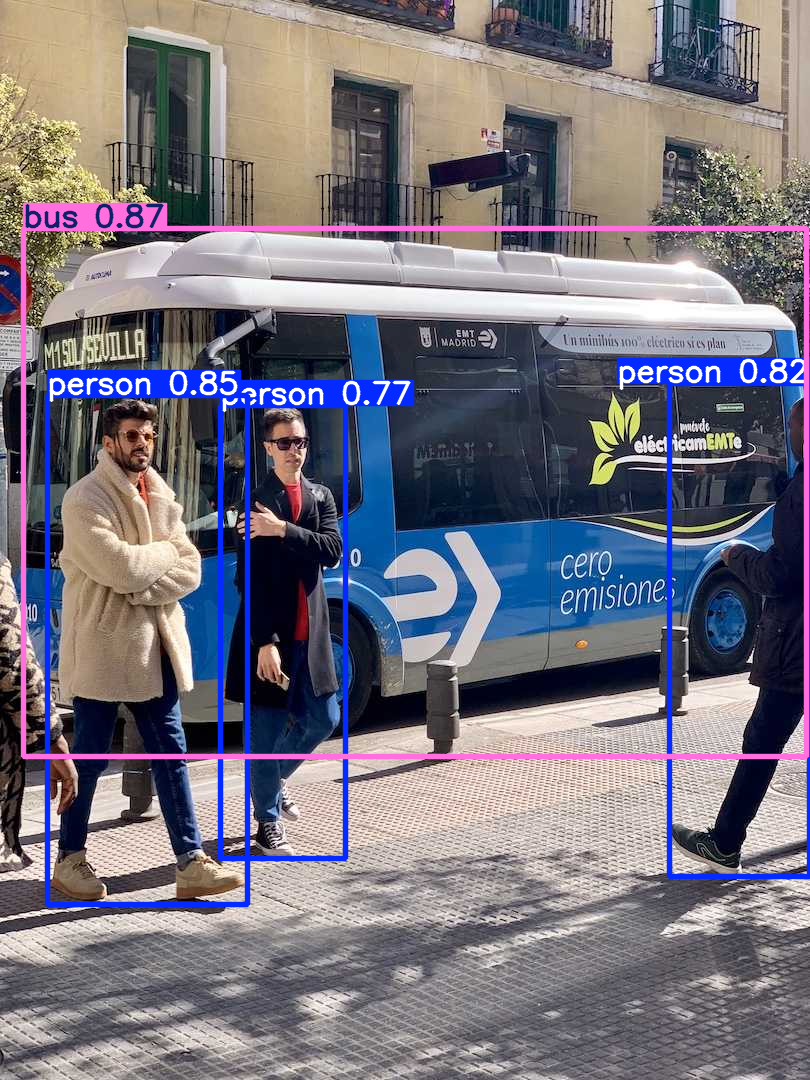

In [53]:
from PIL import Image

sample_img = 'https://ultralytics.com/images/bus.jpg'  # ÏòàÏ†ú Ïù¥ÎØ∏ÏßÄ
pred = model.predict(sample_img, save=False, imgsz=640, conf=0.50)
res = pred[0]

#ÏãúÍ∞ÅÌôî
img_bgr = res.plot(boxes=True, masks=True, probs=False, labels=True)
img_rgb = Image.fromarray(img_bgr[..., ::-1])
display(img_rgb)

## 5. ÌïôÏäµ Í≥°ÏÑ† Î∂ÑÏÑù üìà

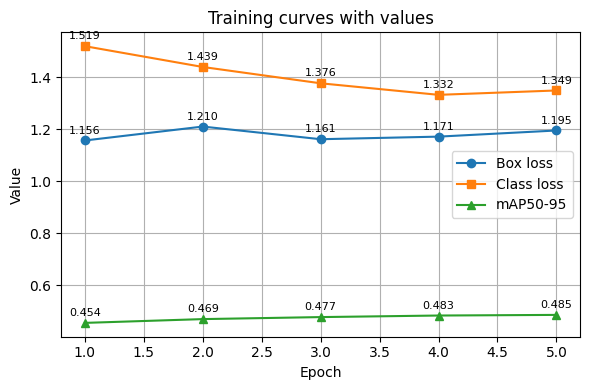

In [60]:
logfile = 'runs/detect/train/results.csv'
df = pd.read_csv(logfile)

plt.figure(figsize=(6,4))
# ÌîåÎ°Ø
plt.plot(df['epoch'], df['train/box_loss'], marker='o', label='Box loss')
plt.plot(df['epoch'], df['train/cls_loss'], marker='s', label='Class loss')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], marker='^', label='mAP50-95')

# ÎùºÎ≤® Ï∂îÍ∞Ä
for x, y in zip(df['epoch'], df['train/box_loss']):
    plt.annotate(f"{y:.3f}", xy=(x, y), xytext=(0,5), textcoords='offset points', ha='center', fontsize=8)
for x, y in zip(df['epoch'], df['train/cls_loss']):
    plt.annotate(f"{y:.3f}", xy=(x, y), xytext=(0,5), textcoords='offset points', ha='center', fontsize=8)
for x, y in zip(df['epoch'], df['metrics/mAP50-95(B)']):
    plt.annotate(f"{y:.3f}", xy=(x, y), xytext=(0,5), textcoords='offset points', ha='center', fontsize=8)

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.title('Training curves with values')
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. ÌÅ¥ÎûòÏä§Î≥Ñ ÌòºÎèô ÌñâÎ†¨

### ÌòºÎèôÌñâÎ†¨ (Confusion MatrixÎûÄ?)

#### Ï†ïÏùò

Confusion‚ÄØMatrixÎäî TP(True‚ÄØPositive), FP(False‚ÄØPositive), FN(False‚ÄØNegative) Î•º ÌñâÎ†¨Î°ú ÏãúÍ∞ÅÌôîÌï¥ Î™®Îç∏Ïù¥ Ïñ¥Îñ§ Ïò§Î•òÎ•º ÏûêÏ£º ÎÇ¥ÎäîÏßÄ ÌïúÎààÏóê Î≥¥Ïó¨Ï§çÎãàÎã§.

- Ïò§Í≤ÄÏ∂ú(FP) ÎßéÏùÄ ÌÅ¥ÎûòÏä§ ‚Üí Confidence‚ÄØThreshold‚Üë    
- ÎØ∏Í≤ÄÏ∂ú(FN) ÎßéÏùÄ ÌÅ¥ÎûòÏä§ ‚Üí Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï¬∑ÎùºÎ≤® Î≥¥Ï†ï    
- ÌÅ¥ÎûòÏä§ Í∞Ñ ÌòºÎèô ÌôïÏù∏ ‚Üí Ïú†ÏÇ¨ ÌÅ¥ÎûòÏä§ Î≥ëÌï©/Î∂ÑÎ¶¨ Í≤ÄÌÜ†    

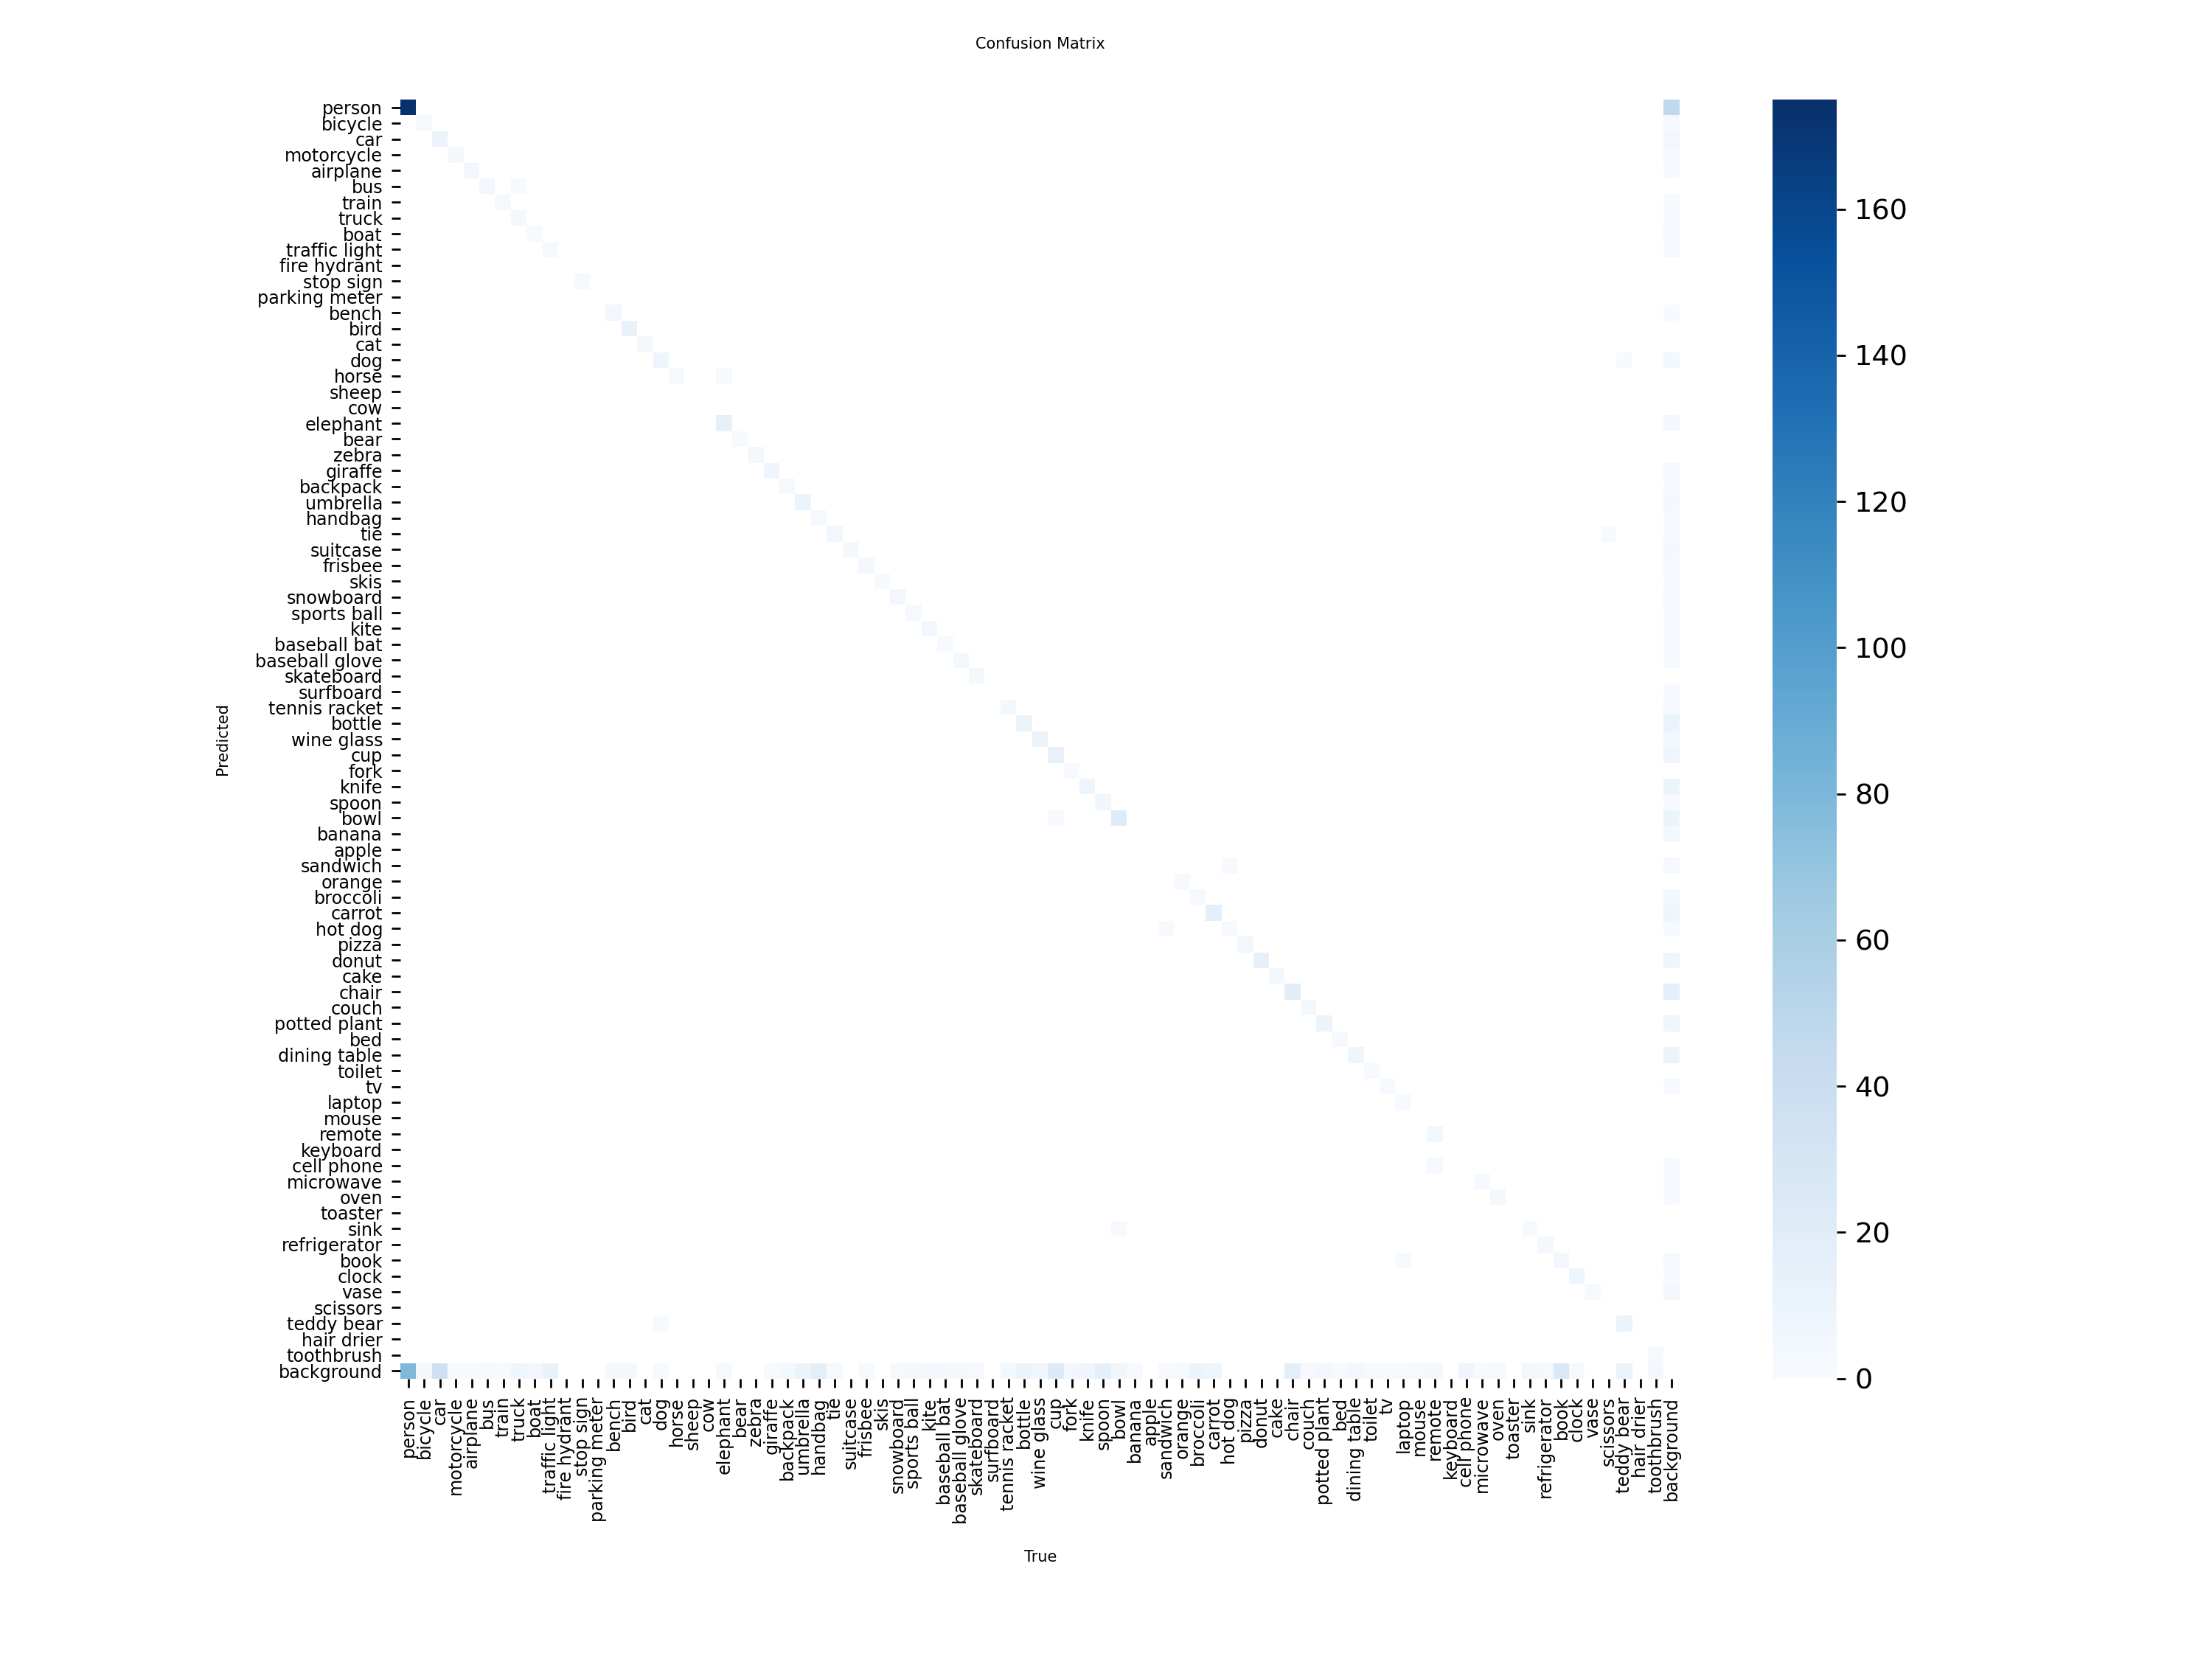

In [61]:
# metrics Í∞ùÏ≤¥Ïóê confusion_matrix ÏÜçÏÑ±Ïù¥ Ìè¨Ìï®Îê® (Ïù¥ÎØ∏ÏßÄ ÌååÏùº)
cm_path = 'runs/detect/train/confusion_matrix.png'
if os.path.exists(cm_path):
    from IPython.display import Image
    display(Image(filename=cm_path))
else:
    print("Confusion matrix Ïù¥ÎØ∏ÏßÄÎ•º Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§.")



## 8. Future work  
1. **ÏóêÌè¨ÌÅ¨¬∑Î∞∞Ïπò ÌÅ¨Í∏∞ Ï°∞Ï†ï** ‚Äì Îçî ÎßéÏùÄ ÌïôÏäµÏúºÎ°ú ÏÑ±Îä• Ìñ•ÏÉÅ ÏãúÎèÑ  
2. **ÏûêÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©** ‚Äì `data=` Ìï≠Î™©Ïóê Ïó¨Îü¨Î∂ÑÏùò YAML ÏÑ§Ï†ï ÌååÏùº ÏßÄÏ†ï  
3. **Î™®Îç∏ ÌÅ¨Í∏∞ Ïã§Ìóò** ‚Äì `yolov8s.pt`, `yolov8m.pt`, `yolov8l.pt` Îì± ÏÇ¨Ïö©Ìï¥ Î≥¥Í∏∞  
4. **ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù** ‚Äì `lr0`, `weight_decay` Îì± Ïù∏Ïûê ÌäúÎãùÏúºÎ°ú Î™®Îç∏ ÏÑ±Îä• Ìñ•ÏÉÅ

---------
### Text-to-Image ÏÉùÏÑ± Î™®Îç∏ (ÌóàÍπÖÌéòÏù¥Ïä§) üñºÔ∏è

- ÌóàÍπÖÌéòÏù¥Ïä§ÎûÄ?
- Text-to-image ÏÉùÏÑ± Î™®Îç∏Ïù¥ÎûÄ?

### 1. ÌôòÍ≤ΩÍµ¨ÏÑ±

In [ ]:
# diffusers, accelerate, transformers ÏÑ§Ïπò ‚Äì ÏïΩ 1Î∂Ñ
!pip install --upgrade diffusers[torch] transformers accelerate safetensors pillow


In [63]:
from huggingface_hub import login
login()


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
)
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)


----
### Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ± ÌååÎùºÎØ∏ÌÑ∞

- Prompt / Negative‚ÄØPrompt¬†: Î™®Îç∏Ïùò ‚ÄòÎ™ÖÎ†πÎ¨∏‚Äô. Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÎèÑÎ•º Í∞ñÏäµÎãàÎã§.
- Seed¬†: ÎÇúÏàò Ï¥àÍ∏∞Í∞í. Í∞ôÏùÄ ÏãúÎìúÎäî ÎèôÏùº Í≤∞Í≥º Ïû¨ÌòÑÏùÑ Í∞ÄÎä•ÌïòÍ≤å Ìï©ÎãàÎã§.
- Guidance‚ÄØScale (CFG)¬†: ÌîÑÎ°¨ÌîÑÌä∏Î•º ÏñºÎßàÎÇò Í∞ïÌïòÍ≤å Îî∞Î•ºÏßÄ(Î≥¥ÌÜµ 5‚ÄØ‚Äì‚ÄØ15, SD Í∏∞Î≥∏ 7.5 Ï†ïÎèÑ).
- Inference‚ÄØSteps¬†: ÌôïÏÇ∞ Îã®Í≥Ñ Ïàò. Steps‚Üë ‚Üí ÏÑ∏Î∂Ä Î¨òÏÇ¨ Ìñ•ÏÉÅ, Ïó∞ÏÇ∞ ÏãúÍ∞Ñ Ï¶ùÍ∞Ä(20‚ÄØ‚Äì‚ÄØ50 Í∂åÏû•).

ÌäúÎãù ÌåÅ
- ÌïòÎÇòÏî© Î∞îÍøîÎ≥¥Í∏∞(A/B test) ‚Üí Î≥ÄÍ≤ΩÏù¥ ÌíàÏßàÏóê ÎØ∏Ïπú ÏòÅÌñ• ÌååÏïÖÏù¥ Ïâ¨ÏõÄ
- Seed Í≥†Ï†ï + ÌååÎùºÎØ∏ÌÑ∞Îßå Î≥ÄÍ≤Ω ‚Üí Í≤∞Í≥º ÏãúÍ∞ÅÏ†Å ÎπÑÍµêÍ∞Ä Î™ÖÌôï

  0%|          | 0/30 [00:00<?, ?it/s]

Saved to generated.png


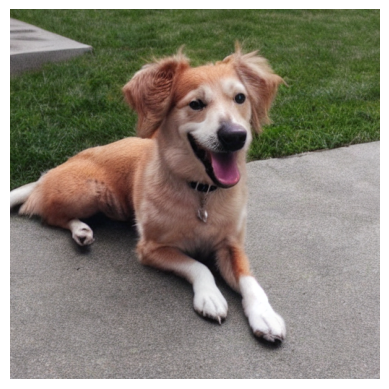

In [72]:
# ÏãúÎìú Í≥†Ï†ï
seed = 107
generator = torch.Generator(device="cuda").manual_seed(seed)

prompt = "a cute dog, realistic"
image = pipe(
    prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    generator=generator
).images[0]

# Í≤∞Í≥º Î≥¥Í∏∞
import matplotlib.pyplot as plt
plt.imshow(image); plt.axis('off')

#### ÌïôÏäµÌïú Î™®Îç∏Î°ú ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄ Ï∂îÎ°†ÌïòÍ∏∞


0: 640x640 1 dog, 25.5ms
Speed: 5.1ms preprocess, 25.5ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 640)


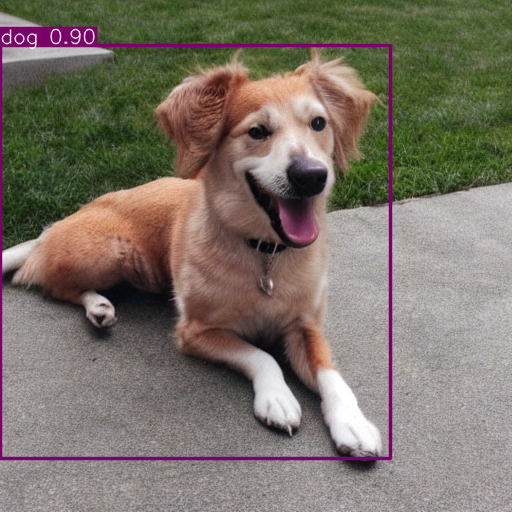

In [74]:
from PIL import Image

pred = model.predict(image, save=False, imgsz=640, conf=0.50)
res = pred[0]

#ÏãúÍ∞ÅÌôî
img_bgr = res.plot(boxes=True, masks=True, probs=False, labels=True)
img_rgb = Image.fromarray(img_bgr[..., ::-1])
display(img_rgb)

#### Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ± Î™®Îç∏Ïùò ÌôúÏö©

1. Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï¬†: Í≤ÄÏ∂úÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ Í∞ÅÎèÑ¬∑Î∞∞Í≤Ω¬∑Ï°∞Î™Ö ÏÉÅÌÉú Ïù¥ÎØ∏ÏßÄÎ•º Ìï©ÏÑ±Ìï¥ YOLO ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä ‚ûú ÌäπÌûà ÏÜåÏàò ÌÅ¥ÎûòÏä§ Í∑†Ìòï Í∞úÏÑ†.

2. Rare‚Äëcase ÏãúÎÆ¨Î†àÏù¥ÏÖò¬†: Ïã§Ï†ú Ï¥¨ÏòÅÏù¥ ÌûòÎì† ÏúÑÌóò¬∑ÏïºÍ∞Ñ¬∑ÏïÖÏ≤úÌõÑ ÏÉÅÌô©ÏùÑ Í∞ÄÏÉÅ ÏÉùÏÑ±.

3. Ïª®ÏÖâ ÏïÑÌä∏¬∑Ïä§ÌÜ†Î¶¨Î≥¥Îìú¬†: Ï†úÌíà¬∑UI‚ÄØmock‚Äëup, Í¥ëÍ≥†¬∑ÎßàÏºÄÌåÖ ÌÅ¨Î¶¨ÏóêÏù¥Ìã∞Î∏å Îπ†Î•∏ ÌîÑÎ°úÌÜ†ÌÉÄÏûÖ.

4. ÍµêÏú°¬∑Ïó∞Íµ¨¬†: Î™®Îç∏ Î≤†Ïù¥Ïä§ÎùºÏù∏ Íµ¨Ï∂ï, Zero‚Äëshot¬∑Few‚Äëshot Ïã§ÌóòÏö© synthetic data.